In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Data/WA_Fn-UseC_-Telco-Customer-Churn.csv",index_col=0)

In [3]:
df.reset_index()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
#df.columns.values

In [5]:
for val in df:
    #print(df[val])
    print(df[val].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [6]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
# This function converts a dataframes column to labels and values for plotting. 

def toLabelsAndValues(dataframe,column):
    
    labels = dataframe[column].value_counts().keys().tolist()
    
    values = dataframe[column].value_counts().values.tolist()
    
    return labels, values 

toLabelsAndValues(df,'Churn')

(['No', 'Yes'], [5174, 1869])

In [7]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

print(lab,val)

Churn = df[df['Churn'] == 'No']['Churn']
NoChurn = df[df['Churn'] == 'Yes']['Churn']

print(df['Churn'].shape)

per_churned = (1869/7043)*100
print(per_churned)

['No', 'Yes'] [5174, 1869]
(7043,)
26.536987079369588


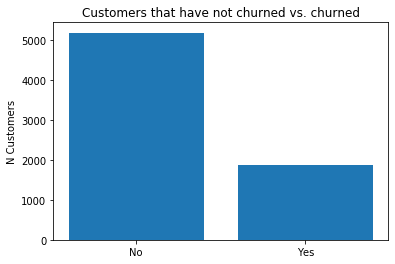

In [32]:
plt.bar(lab,val)
plt.title('Customers that have not churned vs. churned')
plt.ylabel('N Customers')
plt.show()

# We can see that the majority of customers did not churn. 
# 26.54 % of the customers churned. 

In [11]:
#Tenure to categorical column, we want to group customers for better visualization. 
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"

In [12]:
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),axis = 1)

In [21]:
print(df['tenure_group'].value_counts())

tenureGroups = df['tenure_group'].value_counts().keys().tolist()
tenureGroupsvals = df['tenure_group'].value_counts().values.tolist()

Tenure_0-12     2186
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_group, dtype: int64


Text(0, 0.5, 'N Customers')

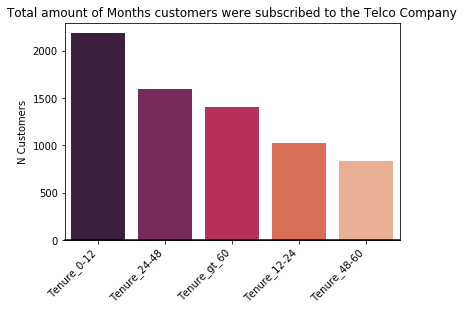

In [52]:
ax = sns.barplot(x=tenureGroups, y=tenureGroupsvals, palette="rocket")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Total amount of Months customers were subscribed to the Telco Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

# Most customers were subscribed 0 to 12 months. The longer the subscription time the less customers.